# STAT3612 Data Mining (2018-19 Semester 2)<a class="anchor" id="top">
## Tutorial Class 4 Basis Expansion
### _Prepared by Dr. Gilbert Lui_

### Table of Contents:

* [What is Basis Expansion?](#basis)
* [Polynomial Basis Fitting](#poly)
    * [Ordinary Polynomial Basis Fitting](#ord)
    * [Orthogonal Polynomial Basis Fitting](#ortho)
* [Piecewise Linear Basis Fitting](#piecewise)
* [B-Splines Basis Fitting](#bspline)
* [Natural Cubic Splines Fitting](#cubic)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### What is Basis Expansion?<a class="anchor" id="basis"></a>

In classical linear model, the relationship between variables $y$ and $x$ is expressed by a linear function, i.e.,

\begin{align}
y = f(x) + \varepsilon,
\end{align}

where $f(x) = \beta_0 + \beta_1 x$.

In basis expansion, the function $f(x)$ is approximated by a **linear combination** of basis functions $\phi_j (x)$ for $j=1,2,\ldots,p$, i.e.,

\begin{align}
f(x) \approx \sum_{j=1}^p \beta_j(x) \phi_j(x) = \phi(x)^T \beta,
\end{align}

where $\phi(x)^T = [\phi_1(x), \phi_2(x), ..., \phi_p(x)]$.

Note that 

* $\phi_j (x)$ can be considerd as a tranformation of $x$.
* $\phi_i (x)$ and $\phi_j (x)$ are independent from each other for $i\ne j$.
* linear combination of basis functions $\phi_j (x)$'s can also be interpreted as the superimposition of basis functions with weights.
* $y$ is still linear in $\beta$. This implies that $\beta$ can be estimated by the **least squares method**.

#### Examples of basis functions

* Ordinary polynomial basis function
* Orthogonal polynomial basis function, e.g. Legendre polynomials
* Piecewise linear basis function
* Spline basis function

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Boston Dataset

The Boston data set contains 506 rows and 14 columns and the observations are stored in the data file `boston.csv`. The data file contains the following columns:

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per \$10,000.
- `ptratio`: pupil-teacher ratio by town.
- `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in \$1000s.

<div style="text-align: right"><a href="#top">Back to the top</a></div>

### Polynomial Basis Fitting<a class="anchor" id="poly"></a>

To illustrate polynomial basis fitting, two types of polynomial basis functions are considered, namely ordinary polynomial basis function and orthogonal polynomial basis function.

####  Ordinary Polynomial Basis Fitting<a class="anchor" id="ord"></a>

**Example 1: Ordinary quadratic basis**

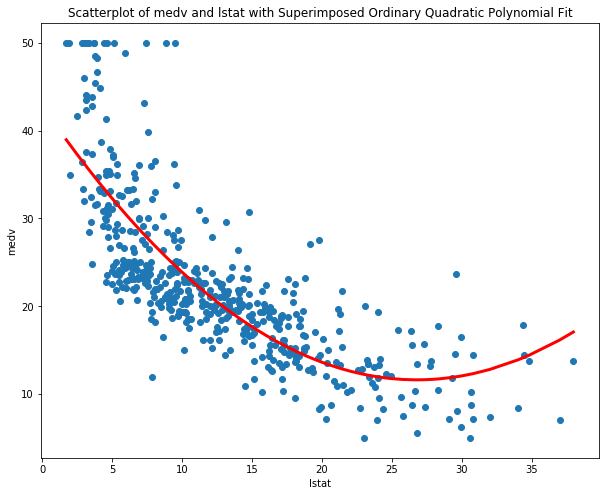

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)

varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
PolyBasis = PolynomialFeatures(degree=2, include_bias=False)
xphi = PolyBasis.fit_transform(x.reshape([-1,1]))
linreg = LinearRegression()
linreg.fit(xphi, y)
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
new_str = "pred_" + varstr
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)

plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Ordinary Quadratic Polynomial Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

**Example 2: Ordinary cubic basis**

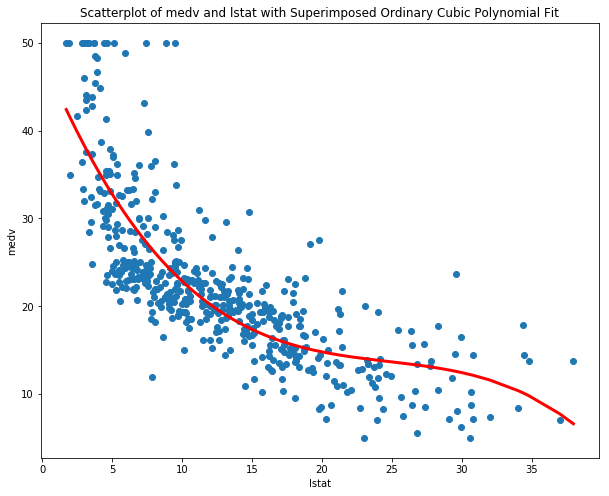

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)

varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
PolyBasis = PolynomialFeatures(degree=3, include_bias=False)
xphi = PolyBasis.fit_transform(x.reshape([-1,1]))
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)

plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Ordinary Cubic Polynomial Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

####  Orthogonal Polynomial Basis Fitting<a class="anchor" id="ortho"></a>

**Example 3: Orthogonal quadratic basis**

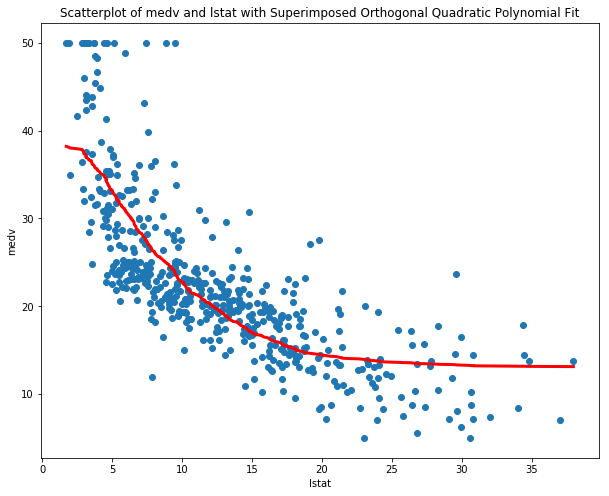

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sympy import *

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)

varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
order = 2
xphi = np.zeros((x.shape[0], order))
x0 = np.linspace(-1, 1, x.shape[0])
for j in range(order):
    xphi[:,j] = [legendre(j+1,x1) for x1 in x0]
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Orthogonal Quadratic Polynomial Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

**Example 4: Orthogonal cubic basis**

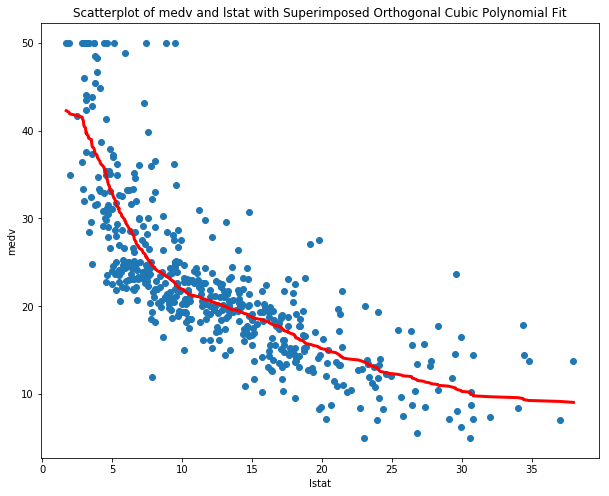

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sympy import *

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)

varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
order = 3
xphi = np.zeros((x.shape[0], order))
x0 = np.linspace(-1, 1, x.shape[0])
for j in range(order):
    xphi[:,j] = [legendre(j+1,x1) for x1 in x0]
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Orthogonal Cubic Polynomial Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

###  Piecewise Linear Basis Fitting<a class="anchor" id="piecewise"></a>

**Example 5: Piecewise linear basis**

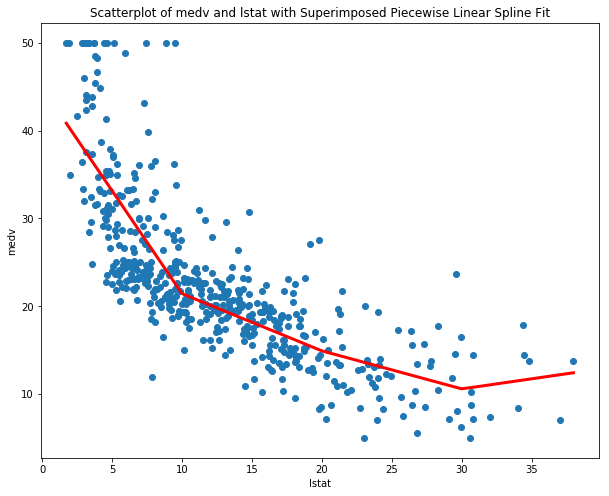

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

def PieceLinearSpline(x, tau):
    xphi = [min(max(x1-min(x), 0), tau[0]-min(x)) for x1 in x]
    for k in range(1,len(tau)):
        tmp = [min(max(x1-tau[k-1], 0), tau[k]-tau[k-1]) for x1 in x]
        xphi = np.column_stack((xphi, tmp))
    xphi = np.column_stack((xphi, [max(x1-tau[len(tau)-1], 0) for x1 in x]))
    return xphi

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)
tau = [10,20,30]

varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
xphi = PieceLinearSpline(x, tau)
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)

plt.figure(figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Piecewise Linear Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

###  B-Spline Basis Fitting<a class="anchor" id="bspline"></a>

**Example 6: B-Spline basis with degree 3**

By default, `bs()` function chooses the knots which correspond to the 25th, 50th, and 75th percentiles of `x`. Alternatively, the knots can be specified using the `knots=` option in the `bs()` function.

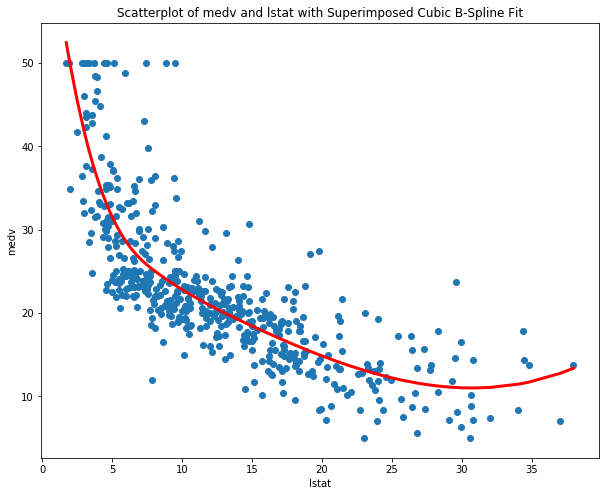

In [6]:
from patsy import dmatrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)
 
varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
xphi = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})    
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(1, figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Cubic B-Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

**Example 7:  B-Spline basis with and 2 knots and degree 3**

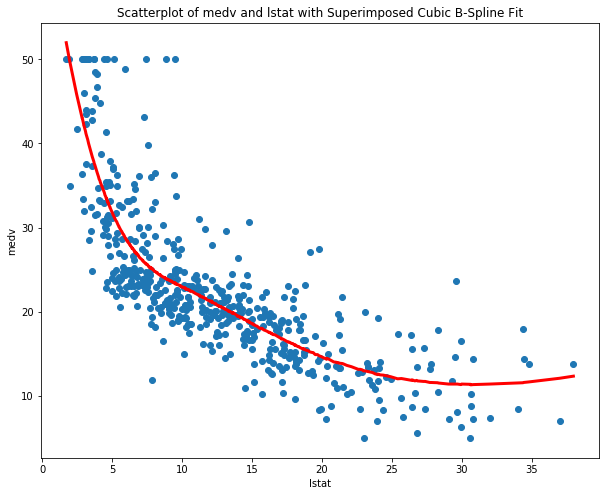

In [7]:
from patsy import dmatrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)
 
varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
xphi = dmatrix("bs(x, df=6, knots=(10,20), degree=3, include_intercept=True) - 1", {"x": x})    
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(1, figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Cubic B-Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

<div style="text-align: right"><a href="#top">Back to the top</a></div>

###  Natural Cubic Spline Basis Fitting<a class="anchor" id="bspline"></a>

**Example 8: Polynomial spline with degree 3**

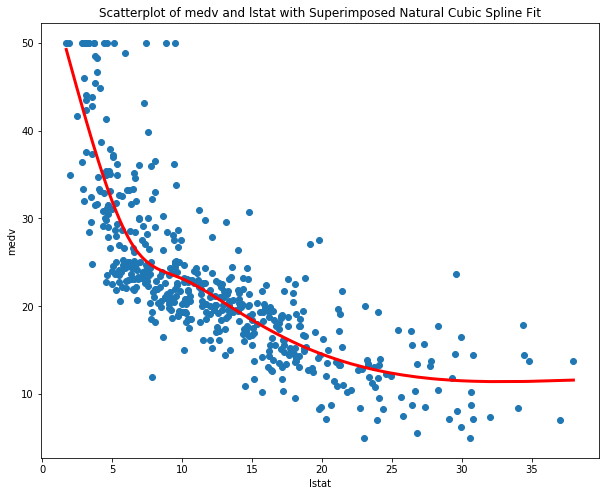

In [8]:
from patsy import dmatrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
 
boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)
 
varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
xphi = dmatrix("cr(x, df=6) - 1", {"x": x})    
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(1, figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Natural Cubic Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

**Example 9: Polynomial spline with 4 knots and degree 3**

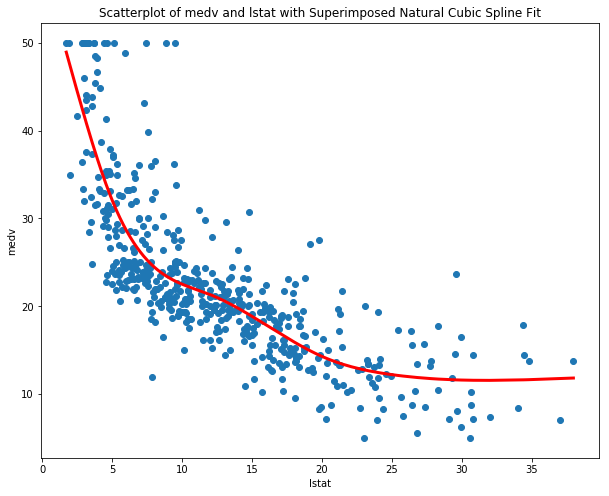

In [9]:
from patsy import dmatrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
 
boston = pd.read_csv("boston.csv", delimiter=',', index_col = 0)
 
varstr = "lstat"
dat = boston.sort_values(varstr)
y = dat["medv"].values
x = dat[varstr].values
xphi = dmatrix("cr(x, df=6, knots=(5,12,20,25)) - 1", {"x": x})    
linreg = LinearRegression()
linreg.fit(xphi, y)
new_str = "pred_" + varstr
newdat = pd.DataFrame({'medv':y})
newdat[varstr] = x
newdat[new_str] = linreg.predict(xphi)
newboston = newdat.sort_values(varstr)
 
plt.figure(1, figsize=(10,8))
plt.title("Scatterplot of medv and lstat with Superimposed Natural Cubic Spline Fit")
plt.ylabel("medv")
plt.xlabel("lstat")
plt.scatter(y=boston["medv"].values, x=boston["lstat"].values)
plt.plot(newboston["lstat"].values, newboston["pred_lstat"].values, "r-", linewidth=3)

<div style="text-align: right"><a href="#top">Back to the top</a></div>